In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = pd.read_csv("ingred_decode.csv", index_col=0)
headers = list(headers["0"].values)
headers

['5-spice',
 'Beetroot',
 'Fenugreek',
 'Fish',
 'Fish sauce',
 'MSG',
 'acai',
 'adodo sauce',
 'agave',
 'agave syrup',
 'aioli sauce',
 'alfalfa sprout',
 'alfredo sauce',
 'all spice',
 'almond',
 'almond butter',
 'almond extract',
 'anchovy',
 'annatto',
 'apple',
 'apple juice',
 'apple sauce',
 'apricot',
 'arrowhead',
 'artichoke heart',
 'arugula',
 'asafoetida',
 'asparagus',
 'avocado',
 'bacon',
 'bacon grease',
 'baked bean',
 'baking mix',
 'baking powder',
 'baking soda',
 'bamboo',
 'banana',
 'barbeque sauce',
 'barley',
 'barley rusk',
 'basil',
 'bay leaf',
 'bean',
 'bean paste',
 'bean salad',
 'bean sauce',
 'bean sprout',
 'bechamel sauce',
 'beef',
 'beer',
 'beet juice',
 'beetroot',
 'bell pepper',
 'berry',
 'biscuit',
 'black bean',
 'black eyed pea',
 'black pepper',
 'blackberry',
 'blueberry',
 'bok choy',
 'bone',
 'bonito flake',
 'bouquet garni',
 'bread',
 'bread mix',
 'breadcrumb',
 'broad bean',
 'broccoli',
 'broccoli rabe',
 'broccolini',
 'brow

In [3]:
data = pd.read_csv("recipes_mapped_encoded.csv", index_col=0)
data = data.drop(["prep time"],axis=1)
data = data.drop(["rating"],axis=1)
data = data.drop(["cuisine"],axis=1)
data.columns = headers
# data = data.T
# cols = list(data) 
data

,5-spice,Beetroot,Fenugreek,Fish,Fish sauce,MSG,acai,adodo sauce,agave,agave syrup,...,worcestershire sauce,wrap,yakisoba sauce,yam,yeast,yogurt,yuca,za'atar,zest,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Summary Statistics:\n")
summary = data.describe(percentiles=[])
print(np.transpose(np.round(summary)))

Summary Statistics:

             count  mean  std  min  50%  max
5-spice     6757.0   0.0  0.0  0.0  0.0  1.0
Beetroot    6757.0   0.0  0.0  0.0  0.0  1.0
Fenugreek   6757.0   0.0  0.0  0.0  0.0  1.0
Fish        6757.0   0.0  0.0  0.0  0.0  1.0
Fish sauce  6757.0   0.0  0.0  0.0  0.0  1.0
...            ...   ...  ...  ...  ...  ...
yogurt      6757.0   0.0  0.0  0.0  0.0  1.0
yuca        6757.0   0.0  0.0  0.0  0.0  1.0
za'atar     6757.0   0.0  0.0  0.0  0.0  1.0
zest        6757.0   0.0  0.0  0.0  0.0  1.0
zucchini    6757.0   0.0  0.0  0.0  0.0  1.0

[583 rows x 6 columns]


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
max_clusters = 20
df_score = pd.DataFrame(columns = ["NumCluster","Silhouette", "Inertia"])
for i in range(2, max_clusters):
    kmeans = KMeans(i,init="random", n_init = 10, max_iter= 1000, random_state = 8)
    kmeans.fit(data) 
    
    goodness = silhouette_score(data,kmeans.predict(data))
    print("No Clusters =", i," Silhouette = ",goodness)
    df_score = df_score.append({"NumCluster":i, "Silhouette":goodness, "Inertia":kmeans.inertia_}, ignore_index = True)

No Clusters = 2  Silhouette =  0.04993755186535876
No Clusters = 3  Silhouette =  0.045867570491642994
No Clusters = 4  Silhouette =  0.04597687236941319
No Clusters = 5  Silhouette =  0.0277786988311717
No Clusters = 6  Silhouette =  0.03433102437675597
No Clusters = 7  Silhouette =  0.0354549170246057
No Clusters = 8  Silhouette =  0.034883148531352916
No Clusters = 9  Silhouette =  0.03563081314912721
No Clusters = 10  Silhouette =  0.03501985132752764
No Clusters = 11  Silhouette =  0.03840989466688443
No Clusters = 12  Silhouette =  0.03571536908427726
No Clusters = 13  Silhouette =  0.03443771463108686
No Clusters = 14  Silhouette =  0.03421107304425163
No Clusters = 15  Silhouette =  0.031148928230394047
No Clusters = 16  Silhouette =  0.029632333975611887
No Clusters = 17  Silhouette =  0.030005507729241477
No Clusters = 18  Silhouette =  0.0343533531710307
No Clusters = 19  Silhouette =  0.028697438737928054


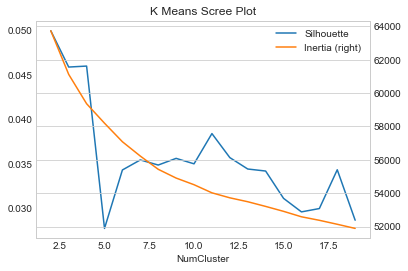

In [7]:
# scree chart
plt.style.use('seaborn-whitegrid')
ax = plt.gca()
df_score.plot(x='NumCluster', y='Silhouette',markerfacecolor='None',markeredgecolor='k', ax=ax)
df_score.plot(x='NumCluster', y='Inertia',markerfacecolor='None',markeredgecolor='k', ax=ax, secondary_y=True)
plt.title('K Means Scree Plot',fontsize=12)
plt.xlabel("Number of Clusters",fontsize=12)
plt.show()

In [8]:
clusters = 11
kmeans = KMeans(clusters,init="random", n_init = 10, max_iter= 1000, random_state = 8)
kmeans.fit(data) 

goodness = silhouette_score(data,kmeans.predict(data))
print("No Clusters =", clusters," Silhouette = ",goodness)

No Clusters = 11  Silhouette =  0.03840989466688443


In [9]:
temp = data
temp["Cluster"] = kmeans.predict(data)
# find number of members in each cluster
count = temp.groupby('Cluster')['Cluster'].count()
# find cluster averages
cluster_means = np.round(temp.groupby(['Cluster']).mean(),decimals=3)

In [10]:
cluster_means['Count'] = count
print(np.transpose(cluster_means.sort_values(by = "Count", ascending = False)))

Cluster          6        0        7        10       3        9        1   \
5-spice       0.000    0.002    0.000    0.000    0.019    0.000    0.010   
Beetroot      0.000    0.002    0.000    0.000    0.000    0.000    0.000   
Fenugreek     0.000    0.000    0.000    0.000    0.000    0.000    0.000   
Fish          0.000    0.000    0.000    0.000    0.000    0.002    0.000   
Fish sauce    0.000    0.000    0.000    0.000    0.002    0.000    0.000   
...             ...      ...      ...      ...      ...      ...      ...   
yuca          0.000    0.001    0.000    0.000    0.000    0.000    0.000   
za'atar       0.000    0.000    0.001    0.000    0.000    0.000    0.000   
zest          0.000    0.000    0.001    0.000    0.000    0.003    0.000   
zucchini      0.023    0.019    0.110    0.029    0.021    0.015    0.047   
Count       949.000  859.000  792.000  682.000  616.000  595.000  573.000   

Cluster          2        8        4        5   
5-spice       0.000    0.0

In [11]:
temp_group = temp.groupby('Cluster')
df = temp_group.get_group(3)
df = df.loc[:, (df != 0).any(axis=0)]
df

,5-spice,Fish sauce,MSG,agave,agave syrup,almond,apple,apple juice,apple sauce,apricot,...,water,water chestnut,wine,worcestershire sauce,wrap,yakisoba sauce,yeast,yogurt,zucchini,Cluster
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
331,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6630,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
